# Basic Julia Tutorial

# Running/Installing Julia

This is a notebook. To run in you need Julia and Jupyter (or nteract/VS Code, see below).

1. To run Julia without a local installation, use (for instance) [CoCalc](https://cocalc.com).

2. To install Julia on your machine, [download and install it](https://julialang.org/downloads/). 

3. You may also want to use [VS Code with the Julia extension](https://github.com/julia-vscode/julia-vscode) IDE. It can run script files and notebooks (no IJulia installation is required). See [julia-vscode.org](https://www.julia-vscode.org/) for more information.

4. To run notebooks with either Jupyter/JupyterLab or nteract from your local installation, see [IJulia](https://github.com/JuliaLang/IJulia.jl) for instructions. See also below for some hints.

5. To create and run script files instead of notebooks, see the comments towards the end of this notebook.



## More Details on Installing nteract

If you want to use nteract do as follows: install IJulia, but do *not* call on `notebook()`  to avoid the automatic Python installation. Then install nteract and start using it.


## More Details on Installing Jupyter/JupyterLab

1. After installing IJulia and issuing the command `notebook()` a new local Python installation will be made - unless IJulia finds an existing installation (see below for how to avoid this).

2. If you already have a Python installation (with Jupyter/JupyterLab),  run `ENV["JUPYTER"] = "C:\\Miniconda3\\Scripts\\jupyter.exe"` (change the path as needed) before you install IJulia. The best is perhaps to add this to your startup.jl file (~/.julia/config/startup.jl, for instance, C:\Users\yourusername\.julia\config\startup.jl if you are on Windows). You can test whether it works by running ```run(`$(ENV["JUPYTER"]) --version`)``` from the Julia REPL.

3. On Windows, it helps to allow the Python installer to add python to the system path (in spite of the warnings).

4. To use Jupyter, start Julia and run `using IJulia; notebook(dir=pwd())` (change the directory as needed). Instead, to run JupyterLab do `using IJulia;jupyterlab(dir=pwd())`.

# Documentation and Help

1.  Cheat sheet at [QuantEcon](https://cheatsheets.quantecon.org/julia-cheatsheet.html)
2.  [Wiki book](https://en.wikibooks.org/wiki/Introducing_Julia)
3.  [Short tutorials](https://techytok.com/from-zero-to-julia/) 
4.  [ThinkJulia](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html) is a free on-line book
5.  The [official Julia on-line manual](https://docs.julialang.org)
6.  Discussion lists are found at
    *  https://discourse.julialang.org/
    *  https://stackoverflow.com/questions/tagged/julia-lang
    *  https://www.reddit.com/r/Julia/
    *  https://gitter.im/JuliaLang/julia
7. In Julia, do ```? cos``` to get help with the cos function    

# About Notebooks

This cell is a "Markdown" cell. This is meant for comments and documentation, not computations.

You can change a cell to "Code" or "Markdown" in the menu.

Markdown cells can handle LaTeX. An example: $\alpha = \beta/2$. A Markdown cell can also contain some *formatting*, like lists of this kind

1. To insert a new cell, use the menu. 

2. The next cell is "Code". You can run it. Text after a # sign is treated as a comment.

3. The subsequent cell shows how to get help on a command.

In [1]:
a = 2                  #this is a comment
                       #run this cell by using the menu, or by Shift+Enter

2

In [2]:
? cos                  #to get help on the cos() function

search: cos cosh cosd cosc cospi acos acosh acosd sincos sincosd sincospi const



```
cos(x)
```

Compute cosine of `x`, where `x` is in radians.

See also [`cosd`], [`cospi`], [`sincos`], [`cis`].

---

```
cos(A::AbstractMatrix)
```

Compute the matrix cosine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the cosine. Otherwise, the cosine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> cos(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
  0.291927  -0.708073
 -0.708073   0.291927
```


# Load Packages and Extra Functions

There are many packages for Julia, for instance, for plotting or statistical methods (see [JuliaHub](https://juliahub.com/) for a list). To install a package, you do either 

1. (works everywhere) run `import Pkg` and then `Pkg.add("Packagename")`

2. (works in the Julia console, REPL) enter the "package manager mode" by typing `]`, then run `add PackageName`. You leave the package manager mode by ctrl-c or backspace.

Once a package is installed, you can use it by running

```
using PackageName
```

In [3]:
using Printf

include("jlFiles/printmat.jl")      #just a function for prettier matrix printing

printyellow (generic function with 1 method)

In [4]:
using Plots                 #this loads the Plots package

#pyplot(size=(600,400))    #choice of plotting backend
gr(size=(480,320))
default(fmt = :png)        # :svg gives prettier plots

# Scalars and Matrices



### Create a Scalar and a Matrix

In [5]:
q = 1                             #create a scalar
Q = [ 1 2 3;                      #create 2x3 matrix
      4 5 6 ] 
println("q is a scalar. To print, use println() or printlnPs()")
println(q)

println("\nQ is a matrix. To print, use display() or printmat()")
printmat(Q)                       #case sensitive (q and Q are different)
                                  #the \n adds a line break

q is a scalar. To print, use println() or printlnPs()
1

Q is a matrix. To print, use display() or printmat()
     1         2         3    
     4         5         6    



### Picking Out Parts of a Matrix

In [6]:
println("\n","element [1,2] of Q: ",            #commands continue on
        Q[1,2])                                 #the next line (until finished)

println("\ncolumns 2 and 3 of Q: ")
printmat(Q[:,2:3])

println("\nline 1 of Q (as a vector): ")
printmat(Q[1,:])


element [1,2] of Q: 2

columns 2 and 3 of Q: 
     2         3    
     5         6    


line 1 of Q (as a vector): 
     1    
     2    
     3    



### Basic Linear Algebra

The syntax for linear algebra is similar to the standard text book approach. For instance, 
* `Q'Q` (or `Q'*Q`) multiplies the transpose ($Q'$) with the matrix ($Q$)
* `A*B` does matrix multiplication
* `100*Q` multiplies each element of the matrix ($Q$) by 100. (You can also do `100Q`.)

However, to add a scalar to each element of a matrix, use `100 .+ Q`. Notice the dot.

In [7]:
println("transpose of Q:")
printmat(Q')

println("Q'Q:")
printmat(Q'Q)

println("scalar * matrix:")
printmat(100*Q)

println("scalar .+ matrix:")        #notice the dot
printmat(100 .+ Q)

transpose of Q:
     1         4    
     2         5    
     3         6    

Q'Q:
    17        22        27    
    22        29        36    
    27        36        45    

scalar * matrix:
   100       200       300    
   400       500       600    

scalar .+ matrix:
   101       102       103    
   104       105       106    



### Creating a Sequence and a Vector

In [8]:
θ = 1:10:21                  #a range, type \theta[TAB] to get this symbol
println("\n","θ is a sequence: ",θ)

ρ = collect(θ)               #make the sequence into a vector, \rho[TAB]
println("\n","ρ is a vector: ")
printmat(ρ)


θ is a sequence: 1:10:21

ρ is a vector: 
     1    
    11    
    21    



# Comparing Things

To see if the scalar z <= 0, do 
```
vv = z <= 0
```
to get a single output (true or false).

Instead, if x is an array, do 
```
vv = x .<= 0                      #notice the dot.
```
to get an array of outputs (same dimension as x)

In [9]:
x =  [-1.5,-1.0,-0.5,0,0.5]             #this is a vector

println("x values: ")
printmat(x)

vv = -1 .< x .<= 0                      #true for x values (-1,0], vv is a vector
println("true if x is in (-1,0]: ")
printmat(vv)

x2 = x[vv]                              #x values for which vv==true
println("x values that are in (-1,0]: ")
printmat(x2)

x values: 
    -1.500
    -1.000
    -0.500
     0.000
     0.500

true if x is in (-1,0]: 
     0    
     0    
     1    
     1    
     0    

x values that are in (-1,0]: 
    -0.500
     0.000



# Finding Things (extra)

can be done by indexing as shown before. However, it might be more efficient to use one of `findfirst()`, `findall()` and `indexin()`. 

Also, if you just need to check if the number `z` is in an array (or any collection) `x`, then use `in(z,x)`.

In [10]:
x =  [-1.5,-1.0,-0.5,0,0.5]             #this is a vector

println("x values: ")
printmat(x)

v1 = findfirst(x.==0)
println("(first) index v in x such x[v]==0: ",v1)

v2 = findall(x.>=0)
println("\nall indices v in x such x[v]>=0: ")
printmat(v2)

y = [-1.0,0]
v3 = indexin(y,x)
println("\nindices in x so that x[v] equals the vector y=$y: ")
printmat(v3)

v4 = in(0,x)
println("\ntesting if 0 is in x: ",v4)

x values: 
    -1.500
    -1.000
    -0.500
     0.000
     0.500

(first) index v in x such x[v]==0: 4

all indices v in x such x[v]>=0: 
     4    
     5    


indices in x so that x[v] equals the vector y=[-1.0, 0.0]: 
     2    
     4    


testing if 0 is in x: true


# Simple Functions

The next cell defines two new functions, `fn0()` and `fn1()`. They take a scalar input (`x`) and return a scalar output (`y`).

If you instead use a vector as the input, then the computation fails. (The reason is that you cannot do x^2 on a vector. You could on a square matrix, though.)

However, using the "dot" syntax
```
y = fn1.(x)
```
gives an array as output where element `y[i,j] = fn1(x[i,j])`.

In [11]:
fn0(x) = (x-1.1)^2 - 0.5      #define a one-line function

function fn1(x)               #define a function that could have many lines
  y = (x-1.1)^2 - 0.5
  return y
end

fn1 (generic function with 1 method)

In [12]:
y = fn1(1.5)
printlnPs("result from fn1(1.5): ",y," and compare with fn0(1.5) ",fn0(1.5))

x = [1;1.5]
#y = fn1(x)                   #would give an error 
y = fn1.(x)                   #calling on the function, dot. to do for each element in x
printlnPs("\nresult from fn1.(x): ")
printmat(y)

result from fn1(1.5):     -0.340 and compare with fn0(1.5)     -0.340

result from fn1.(x): 
    -0.490
    -0.340



# if-else

allows you to run different comman ddepending on a condition which you specify.

(extra) There are also other (more compact) possibilities for `if-else` case

1. `y = ifelse(z <= 2,z,2)` or 
2. `y = z <= 2 ? z : 2`
(In this partcular case, `y=minimum(z,2)` also works.)

You can also insert an `ifelse` command.

In [13]:
z = 1.05

if z <= 2          #(a) if true, run the next command (y=z) and then jump to end
    y = z
else               #(b) if (a) is false, do this instead
    y = 2
end

#y = ifelse(z <= 2,z,2)             #these two versions also work
#y = z <= 2 ? z : 2

println(y)

1.05


In [14]:
if z < 1                #(a) if true, run the next command (y=1) and then jump to end
    y = 1
elseif 1 <= z <= 2      #(b) if (a) is false, try this instead  
    y = z
else                    #(c) if also (b) is false, do this
    y = 2
end

println(y)

1.05


# Loops

The are two types of loops: "for loops" and "while loops". 

The *for loop* is best when you know how many times you want to loop (for instance, over all $m$ rows in a matrix). 

The *while loop* is best when you want to keep looping until something happens, for instance, that $x_0$ and $x_1$ get really close.

The default behaviour in *IJulia*, *inside functions* and at the *REPL* promt is that assignments of `x` inside the loop overwrites `x` defined before the loop. To get the same behavior in scripts, you need to add `global x` somewhere inside the loop.

To make sure that the `y` calculated inside the loop does not affect `y` outside the loop, add `local y`.

A variable (here `z2`) that does not exist before the loop is local to the loop.

### A Simple "for loop"

The "for loop" in the next cell makes 3 iterations and changes a global $x$ variable.

In [15]:
x = 0
y = -999
for i = 3:3:9                         #or `i in 3:3:9`, or `v=[3,6,9]; i in v`
    #global x                         #only needed in script
    local y                           #don't overwrite y outside loop
    x = x + i                         #adding i to the "old" x
    y = i
    z2 = -998                         #notice: z2 has not been used before 
    println("i=$i, x=$x and z2=$z2")          #$x prints the value of x
end

println("\nAfter loop: x=$x and y=$y")
#println(z2)            #does not work: z2 is local to the loop

i=3, x=3 and z2=-998
i=6, x=9 and z2=-998
i=9, x=18 and z2=-998

After loop: x=18 and y=-999


### A Double "for loop"

An example of a nested for for loop

```
for j = 1:n, i = 1:m
    #do something
end
```

If you prefer, could also write a longer version to do the same thing
```
for j = 1:n 
    for i = 1:m
        #do something
    end    
end
```

The next cell uses a double loop to fill a matrix. 

In [16]:
(m,n) = (4,3)                     #same as m=4;n=3
x = fill(-999,(m,n))              #to put results in, initialized as -999
for i = 1:m, j = 1:n
    x[i,j] = 10*i + j
end

println("new x matrix: \n")
printmat(x)

new x matrix: 

    11        12        13    
    21        22        23    
    31        32        33    
    41        42        43    



## A Simple "while loop"

The "while loop" in the next cell iterates until two variables ($x_0$ and $x_1$) get close.

The background to the example is that we want to solve a function $f(x)=x^2$ for the $x$ value that makes $f(x)=2$. The Newton-Raphson algorithm starts with a value $x_0$ and updates it to
$
x_1 = x_0 + (2-f(x_0))/f'(x_0)
$
where $f'(x_0)$ is the derivative of $f()$ evaluated at $x_0$. The algorithm iterates until $x_0$ and $x_1$ are close. Clearly, we are trying to find the square root of 2.

In [17]:
println("Solving x^2 = 2 with Newton-Raphson:\n")

f(x) = x^2       #a one-line function named f
f´(x) = 2*x      #another one-line function, named `f´` (yes, the acute accent could be part of a name)

x₀ = Inf         #x\_0[TAB]
x₁ = 10

while abs(x₁-x₀) > 0.001            #keep going until they get similar
    #global x₀, x₁                  #only needed in script
    x₀ = x₁                         #initial guess is taken from old guess
    x₁ = x₀ + (2 - f(x₀))/f´(x₀)     #updating the guess, Newton-Raphson    
    printlnPs(x₀," is changed to ",x₁)
end

printlnPs("\nThe result should be close to ",sqrt(2))

Solving x^2 = 2 with Newton-Raphson:

    10     is changed to      5.100
     5.100 is changed to      2.746
     2.746 is changed to      1.737
     1.737 is changed to      1.444
     1.444 is changed to      1.415
     1.415 is changed to      1.414

The result should be close to      1.414


# A First Plot

With the Plots package you create a a simple plot like this:

1. Plot two curve by using the `plot([x1 x2],[y1 y2])` command
2. Configure curves by `linecolor =`, `linestyle =` etc
2. Add titles and labels by `title = `, `xlabel = `, etc

Notice: the *first plot is slow*.

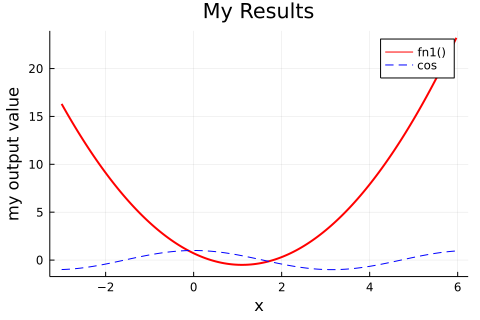

In [18]:
x = -3:6/99:6 

p1 = plot( [x x],[fn1.(x) cos.(x)],
           linecolor = [:red :blue],
           linestyle = [:solid :dash],
           linewidth = [2 1],
           label = ["fn1()" "cos"],
           title = "My Results",
           xlabel = "x",
           ylabel = "my output value" )
display(p1)       #not needed in notebook, but useful in script

# Types: Integers, Floats, Bools and Others

Julia has many different types of variables: signed integers (like 2 or -5), floating point numbers (2.0 and -5.1), bools (false/true), bitarrays (similar to bools, but with more efficient use of memory), strings ("hello"), Dates (2017-04-23) and many more types.

## Integers and Floats

In [19]:
a = 2                   #integer, Int (Int64 on most machines)
b = 2.0                 #floating point, (Float64 on most machines)
A = [1,2]
B = [1.0,2.0]

println("Finding the type of a, b, A and B:")
println(typeof(a)," ",typeof(b)," ",typeof(A)," ",typeof(B))

Finding the type of a, b, A and B:
Int64 Float64 Vector{Int64} Vector{Float64}


## Bools and BitArrays

Bools are "true" or "false". BitArrays are (more memory efficient) versions of this.

In [20]:
c = 2 > 1.1
C = A .> 1.5        #A is an array, so C is too

println("Finding the type of c and C:")
println(typeof(c)," ",typeof(C))

Finding the type of c and C:
Bool BitVector


## Calculations with Mixed Types

A calculation like "integer" + "float" works and the type of the result will be a float (the more flexible type). Similarly, "bool" + "integer" will give an integer. These promotion rules make it easy to have mixed types in calculations, and also provide a simple way of converting a variable from one type to another. (There are also an explicit convert() function that might be quicker.)

In [21]:
println(1+2.0)                #integer + Float
println((1>0) + 2)            #bool + integer

3.0
3


# Running Script Files

instead of notebooks. 

Once you have created a script file (called "myscript.jl" below), then you can, for instance, run it from VS Code or directly from the Julia REPL (looks like a command line). For the latter, do as follows:

1. Open the Julia REPL and perhaps run `cd("folder_name")` to set the working directory (typically to where your script file is).
2. Run `include("myscript.jl")`

As an alternative, instead do the following:

0. Add this close to the top of the script file: `cd(dirname(@__FILE__))`
1. Open the Julia REPL
2. Run `include("foldername/myscript.jl")`

## Performance Tips (extra)

To benchmark your code, install/use the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package.

In [22]:
using BenchmarkTools

function fn2(x) 
    n = length(x)
    z = zero(x)       #array of zeros, same size as x
    for i = 2:n
        z[i] = (x[i] + x[i-1])/2   #moving average
    end
    return z
end

x = [1;zeros(101)]
@btime fn2($x)        #notice the $
println()

  170.192 ns (1 allocation: 896 bytes)

